# Video Game Sales Analysis

---

We're gonna explore the videogame sales dataset with pandas, and visualize it with seaborn.
 
**LET'S MANIPULATE IT!**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


---

-I want to configure my graphics options:

In [2]:
sns.set(style="whitegrid")
sns.set_palette("husl")

In [3]:
# Let's start from importing
video_game = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv",index_col="Rank")

---

In [4]:
# We should explore what we have in our data.
"""
We have some info about data's column names:
-Rank - Ranking of overall sales
-Name - The games name
-Platform - Platform of the games release (i.e. PC,PS4, etc.)
-Year - Year of the game's release
-Genre - Genre of the game
-Publisher - Publisher of the game
-NA_Sales - Sales in North America (in millions)
-EU_Sales - Sales in Europe (in millions)
-JP_Sales - Sales in Japan (in millions)
-Other_Sales - Sales in the rest of the world (in millions)
-Global_Sales - Total worldwide sales.
"""

"\nWe have some info about data's column names:\n-Rank - Ranking of overall sales\n-Name - The games name\n-Platform - Platform of the games release (i.e. PC,PS4, etc.)\n-Year - Year of the game's release\n-Genre - Genre of the game\n-Publisher - Publisher of the game\n-NA_Sales - Sales in North America (in millions)\n-EU_Sales - Sales in Europe (in millions)\n-JP_Sales - Sales in Japan (in millions)\n-Other_Sales - Sales in the rest of the world (in millions)\n-Global_Sales - Total worldwide sales.\n"

-Info table gives us the datatypes and total counts. We can see that our data has 4 different sales and Global Sales as total.

In [5]:
video_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


-Looks like we have some NaN values. We should drop these for more efficient analysis.

In [6]:
# Dropping nan values
video_game.dropna(how="any",inplace = True)
video_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


-Let's see how many rows and cols we got

In [7]:
video_game.shape 

(16291, 10)

In [8]:
# I want to see the dataset's column names
video_game.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

-Let's see first 10 observations of our data.

In [9]:
video_game.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


-And last 10 observations...

In [10]:
video_game.tail(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01


-We can see a lot of games have 0.01 Global Sales rate. But how many? Let's learn this

In [11]:
ZeroZeroOne=video_game[video_game["Global_Sales"]==0.01]
counted_zerozeroone = ZeroZeroOne["Global_Sales"].count()
print("Yes, there are {} games that have 0.01 million sales in Global_Sales column.".format(counted_zerozeroone))

Yes, there are 600 games that have 0.01 million sales in Global_Sales column.


-How many platforms does this data have? 

In [12]:
platforms=video_game["Platform"]
platforms=platforms.drop_duplicates()
platforms=platforms.reset_index()
platforms=platforms.drop(columns="Rank")
counted_platforms=platforms["Platform"].count()
print("There are {} gaming platforms in this video game data".format(counted_platforms))

There are 31 gaming platforms in this video game data


---

# JAPAN Sales

-To analyze Japan's Sales, we should see only Japan's total sales

In [13]:
japan_sales= video_game["JP_Sales"]
sum_of_japan_sales=japan_sales.sum()
print(sum_of_japan_sales)
print("Sum of sales made in Japan is ${:.2f}(million)".format(sum_of_japan_sales))

1284.2700000000002
Sum of sales made in Japan is $1284.27(million)


-Rankings are ordered by Global_Sales column but I want to look from another perspective and select Japan, ranked by Japan


In [14]:
jp_sales=video_game.sort_values("JP_Sales",ascending=False)
jp_sales= jp_sales.reset_index()

-Now i want to drop games that didn't sell in Japanese Game Market.

In [15]:
jp_sales = jp_sales[~(jp_sales["JP_Sales"] <= 0)]  

-I want to select last 5 year's games

In [16]:
jp_latest = jp_sales[jp_sales["Year"]>=2015]
# Sorted by years from the latest to oldest(2015)
jp_latest = jp_latest.sort_values("Year",ascending=False)
jp_latest = jp_latest.reset_index()

-I'm curious about which platform is most in japanese game industries? Let's see

[Text(0, 0.5, 'Platforms'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Latest games in Japan by Platform')]

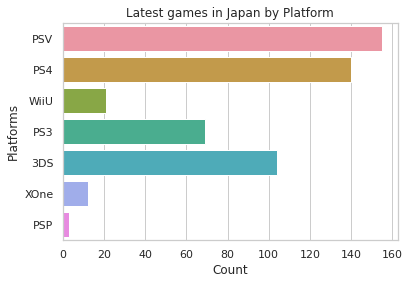

In [17]:
ax=sns.countplot(y="Platform",data=jp_latest)
ax.set(xlabel="Count",ylabel="Platforms",title="Latest games in Japan by Platform")

 Can we say that the latest games are commonly made for Sony consoles and most of it are handheld? 
 But what about sales?

[Text(0, 0.5, 'Platforms'),
 Text(0.5, 0, 'Video Game Sales in Japan(million $)'),
 Text(0.5, 1.0, 'Top Selling Platforms from last 5 years')]

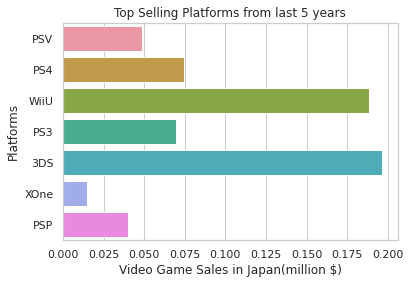

In [18]:
ax=sns.barplot(x="JP_Sales",y="Platform",data=jp_latest,ci=None)
ax.set(xlabel="Video Game Sales in Japan(million $)",ylabel="Platforms",title="Top Selling Platforms from last 5 years")

 Ah, here we can see Nintendo is the most selling brand in Japan! (In last 5 years, of course)


-What is the top selling games by platform in Japan?


In [19]:
jp_plats=jp_sales.groupby("Platform")["JP_Sales"].sum()
jp_plats_sorted=jp_plats.sort_values(ascending=False)

In [20]:
jp_plats_sorted.head(3)

Platform
DS     175.02
PS     139.78
PS2    137.54
Name: JP_Sales, dtype: float64

In [21]:
jp_heads=jp_plats_sorted.head(5)
jp_heads=jp_heads.reset_index()

[Text(0, 0.5, 'Platforms'),
 Text(0.5, 0, 'Video Game Sales in Japan(million $)'),
 Text(0.5, 1.0, 'Best Selling Gaming Platforms in Japan')]

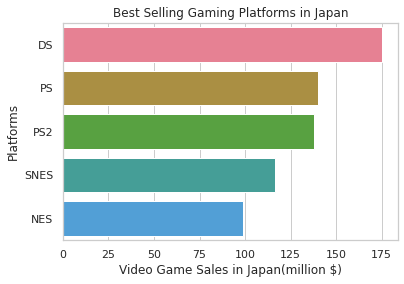

In [22]:
ax=sns.barplot(y="Platform",x="JP_Sales",data=jp_heads)
ax.set(xlabel="Video Game Sales in Japan(million $)",ylabel="Platforms",title="Best Selling Gaming Platforms in Japan")

 We can see that Nintendo DS is the Top Seller at video games. Then followed by Sony's PlayStation and Playstation2 games.
 Actually I really love PSOne, Ps2 and Nintendo DS. This result made me happy :) 


# I'll do more for Japan. But not now.

---

# EUROPE Sales

-What about Europe? Let's have a look!

In [23]:
eu_sales=video_game.sort_values("EU_Sales",ascending=False)
eu_sales=eu_sales.reset_index()
eu_sales = eu_sales[~(eu_sales["EU_Sales"] <= 0)] 

In [24]:
# I want to select last 5 year's games
eu_latest = eu_sales[eu_sales["Year"]>=2015]
# Sorted by years from the latest to oldest
eu_latest = eu_latest.sort_values("Year",ascending=False)
eu_latest = eu_latest.reset_index() 

[Text(0, 0.5, 'Platforms'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Latest games in Europe by Platform')]

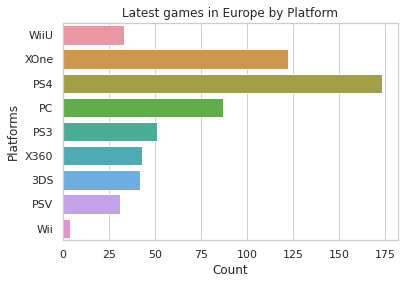

In [25]:
ax=sns.countplot(y="Platform",data=eu_latest)
ax.set(xlabel="Count",ylabel="Platforms",title="Latest games in Europe by Platform")

   Oh, some values are different in Europe. In europe, most of the games are made for PlayStation 4. But in Japan, this was Playstation Vita. 
   
   -But what about sales? Let's look

[Text(0, 0.5, 'Platforms'),
 Text(0.5, 0, 'Video Game Sales in Europe(million $)'),
 Text(0.5, 1.0, 'Top Selling Platforms from last 5 years')]

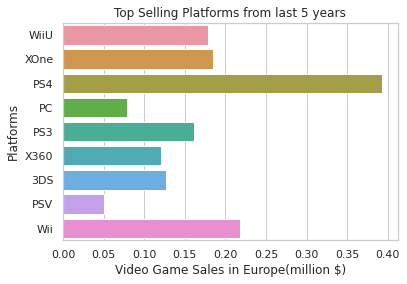

In [26]:
ax=sns.barplot(x="EU_Sales",y="Platform",data=eu_latest,ci=None)
ax.set(xlabel="Video Game Sales in Europe(million $)",ylabel="Platforms",title="Top Selling Platforms from last 5 years")

   Oh, I think I can get this result (but not sure): There are too many PS4 users in Europe. What used most made the most sales.
  
  -And someone still plays Wii :D

-What is the top selling games by platform?


In [27]:
eu_plats=eu_sales.groupby("Platform")["EU_Sales"].sum()
eu_plats_sorted=eu_plats.sort_values(ascending=False)

In [28]:
eu_plats_sorted.head(3)
eu_heads=eu_plats_sorted.head(5)
eu_heads=eu_heads.reset_index()

[Text(0, 0.5, 'Platforms'),
 Text(0.5, 0, 'Video Game Sales in Europe (million $)'),
 Text(0.5, 1.0, 'Best Selling Gaming Platforms in Europe')]

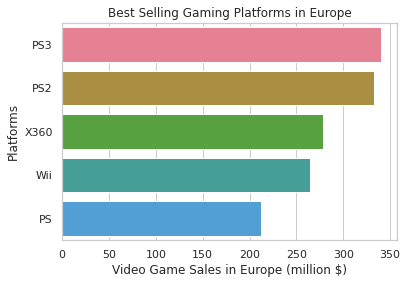

In [29]:
ax=sns.barplot(y="Platform",x="EU_Sales",data=eu_heads)
ax.set(xlabel="Video Game Sales in Europe (million $)",ylabel="Platforms",title="Best Selling Gaming Platforms in Europe")

 All time winner is PlayStation 3 games and followed by Playstation 2 games. And we can see that the third is Microsoft.


**I'll do more for Europe. But not now.**

---

# NORTH AMERICA Sales

-And now we should look what's happening on North America

In [30]:
na_sales=video_game.sort_values("NA_Sales",ascending=False)
na_sales=na_sales.reset_index()
na_sales = na_sales[~(na_sales["NA_Sales"] <= 0)] 

In [31]:
# I want to select last 5 year's games
na_latest = na_sales[na_sales["Year"]>=2015]
# Sorted by years from the latest to oldest
na_latest = na_latest.sort_values("Year",ascending=False)
na_latest = na_latest.reset_index() 

[Text(0, 0.5, 'Platforms'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Latest games in North America by Platform')]

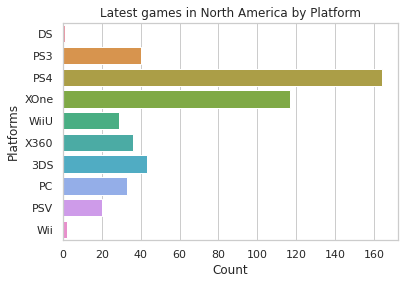

In [32]:
ax=sns.countplot(y="Platform",data=na_latest)
ax.set(xlabel="Count",ylabel="Platforms",title="Latest games in North America by Platform")

 This seems same as Europe's situation.
 
 -But what about sales? Let's look

[Text(0, 0.5, 'Platforms'),
 Text(0.5, 0, 'Video Game Sales in North America (million $)'),
 Text(0.5, 1.0, 'Top Selling Platforms from last 5 years')]

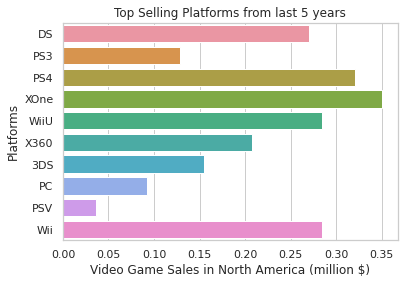

In [33]:
ax=sns.barplot(x="NA_Sales",y="Platform",data=na_latest,ci=None)
ax.set(xlabel="Video Game Sales in North America (million $)",ylabel="Platforms",title="Top Selling Platforms from last 5 years")

 Oh, actually this shocked me. I didn't wait result like this.  
 We can say that North America's most decided to play Xbox One Games in last 5 years.
 
 And I can clearly see that there are too many Nintendo users in North America. (But we can get actual number from this dataset)
 
 That explains why most of the Zelda cosplayers are from the USA (lol)

-What is the top selling games by platform?

In [34]:
na_plats=na_sales.groupby("Platform")["NA_Sales"].sum()
na_plats_sorted=na_plats.sort_values(ascending=False)

In [35]:
na_plats_sorted.head(3)
na_heads=na_plats_sorted.head(5)
na_heads=na_heads.reset_index()

[Text(0, 0.5, 'Platforms'),
 Text(0.5, 0, 'Video Game Sales in North America (million $)'),
 Text(0.5, 1.0, 'Best Selling Gaming Platforms in Europe')]

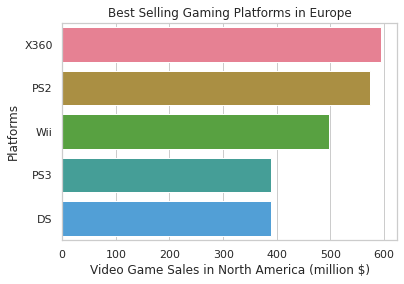

In [36]:
ax=sns.barplot(y="Platform",x="NA_Sales",data=na_heads)
ax.set(xlabel="Video Game Sales in North America (million $)",ylabel="Platforms",title="Best Selling Gaming Platforms in Europe")

 Our thessis is getting more powerful by that result. Xbox won the race in North America despite red ring of death.


---

-We can get some summary statistics with pandas' describe function. 

In [37]:
video_game.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


-I want to see sum of the sales globally

In [38]:
global_sales=video_game["Global_Sales"]
sum_of_global_sales = global_sales.sum()
print(sum_of_global_sales)
print("Sum of sales made in the entire world is ${:.2f}(millions)".format(sum_of_global_sales))

8811.97
Sum of sales made in the entire world is $8811.97(millions)


---

# DARK SOULS

In [39]:
dark_souls=video_game[video_game["Name"].isin(["Dark Souls","Dark Souls II","Dark Souls III","Bloodborne"])]
dark_souls=dark_souls.reset_index()
dark_souls=dark_souls.sort_values(["Name","Rank"],ascending=True)

-To see dark souls games rankings by platforms:

In [40]:
print(dark_souls[["Rank","Name","Platform"]])

     Rank            Name Platform
0     662      Bloodborne      PS4
1     813      Dark Souls      PS3
4    2080      Dark Souls     X360
10  11879      Dark Souls       PC
3    1487   Dark Souls II      PS3
5    2722   Dark Souls II     X360
6    3430   Dark Souls II      PS4
8    7163   Dark Souls II     XOne
9    8119   Dark Souls II       PC
2    1191  Dark Souls III      PS4
7    5270  Dark Souls III     XOne
11  12901  Dark Souls III       PC


-Let's visualize Souls games' rankings

[Text(0, 0.5, 'Platforms'),
 Text(0.5, 0, 'Rankings'),
 Text(0.5, 1.0, "Souls Games' rankings by Platform")]

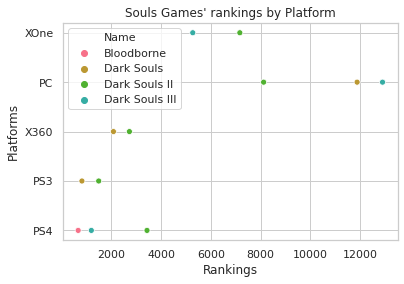

In [41]:
ax=sns.scatterplot(x="Rank",y="Platform",hue="Name",data=dark_souls)
ax.set(xlabel="Rankings",ylabel="Platforms",title="Souls Games' rankings by Platform")

# GTA V

In [42]:
gta=video_game[video_game["Name"]=="Grand Theft Auto V"]
gta=gta[gta["Platform"]=="PS3"]
gtaps3=gta["Global_Sales"]

In [43]:
gtaps3=float(gtaps3)
more_than_gta=video_game[video_game["Global_Sales"]>gtaps3]
print(more_than_gta[["Name","Publisher"]])

                             Name               Publisher
Rank                                                     
1                      Wii Sports                Nintendo
2               Super Mario Bros.                Nintendo
3                  Mario Kart Wii                Nintendo
4               Wii Sports Resort                Nintendo
5        Pokemon Red/Pokemon Blue                Nintendo
6                          Tetris                Nintendo
7           New Super Mario Bros.                Nintendo
8                        Wii Play                Nintendo
9       New Super Mario Bros. Wii                Nintendo
10                      Duck Hunt                Nintendo
11                     Nintendogs                Nintendo
12                  Mario Kart DS                Nintendo
13    Pokemon Gold/Pokemon Silver                Nintendo
14                        Wii Fit                Nintendo
15                   Wii Fit Plus                Nintendo
16            

    We can see that Nintendo beated GTA V! (lol) (Nintendo Fanboy included in that comment)

---

In [44]:
new=video_game[video_game["Year"]==2020]
print(new[["Name","Publisher","Global_Sales"]])

                        Name Publisher  Global_Sales
Rank                                                
5959  Imagine: Makeup Artist   Ubisoft          0.29


    We have just one game from 2020 in this dataset

** I'll do the analysis for Others and Global later.**

---

# Thank you for reading my analysis.